In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main_folder="drive/MyDrive/dataset-resized"
import os
print(os.listdir(main_folder))

['glass', 'plastic', 'trash', 'paper', 'metal', 'cardboard']


In [4]:
!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio(main_folder, output='dataset-split', seed = 1337, ratio= (0.7,0.2,0.1), group_prefix =  None, move = False)

Copying files: 2537 files [00:50, 50.42 files/s]


In [6]:
print(os.listdir('dataset-split'))
print(os.listdir('dataset-split/train/cardboard'))

['train', 'test', 'val']
['cardboard205.jpg', 'cardboard21.jpg', 'cardboard270.jpg', 'cardboard290.jpg', 'cardboard366.jpg', 'cardboard336.jpg', 'cardboard10.jpg', 'cardboard226.jpg', 'cardboard96.jpg', 'cardboard235.jpg', 'cardboard194.jpg', 'cardboard24.jpg', 'cardboard133.jpg', 'cardboard15.jpg', 'cardboard110.jpg', 'cardboard308.jpg', 'cardboard189.jpg', 'cardboard402.jpg', 'cardboard277.jpg', 'cardboard112.jpg', 'cardboard319.jpg', 'cardboard190.jpg', 'cardboard210.jpg', 'cardboard249.jpg', 'cardboard266.jpg', 'cardboard183.jpg', 'cardboard237.jpg', 'cardboard269.jpg', 'cardboard163.jpg', 'cardboard284.jpg', 'cardboard53.jpg', 'cardboard321.jpg', 'cardboard238.jpg', 'cardboard179.jpg', 'cardboard2.jpg', 'cardboard16.jpg', 'cardboard103.jpg', 'cardboard383.jpg', 'cardboard286.jpg', 'cardboard314.jpg', 'cardboard232.jpg', 'cardboard328.jpg', 'cardboard111.jpg', 'cardboard371.jpg', 'cardboard141.jpg', 'cardboard125.jpg', 'cardboard386.jpg', 'cardboard171.jpg', 'cardboard32.jpg', 'car

In [7]:
import numpy as np

# loading training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'dataset-split/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# loading testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        'dataset-split/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')


Found 1773 images belonging to 6 classes.
Found 505 images belonging to 6 classes.


In [8]:
import keras
from keras.applications import MobileNetV2
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
base_model=keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

cnn_mobilenet=base_model.output
cnn_mobilenet=GlobalAveragePooling2D()(cnn_mobilenet)
cnn_mobilenet=Dense(1024,activation='relu')(cnn_mobilenet) #we add dense layers so that the model can learn more complex functions and classify for better results.
cnn_mobilenet=Dense(1024,activation='relu')(cnn_mobilenet) #dense layer 2
cnn_mobilenet=Dense(512,activation='relu')(cnn_mobilenet) #dense layer 3
preds=Dense(6,activation='softmax')(cnn_mobilenet) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

9406464/9406464 [==============================] - 1s 0us/step


In [9]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [16]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model_1 = model.fit(x=train_generator,validation_data = test_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
55/55 [==============================] - 58s 560ms/step - loss: 0.5416 - accuracy: 0.8748 - val_loss: 9.6774 - val_accuracy: 0.2475
Epoch 2/10
55/55 [==============================] - 30s 551ms/step - loss: 0.4294 - accuracy: 0.8748 - val_loss: 5.5525 - val_accuracy: 0.2792
Epoch 3/10
55/55 [==============================] - 30s 539ms/step - loss: 0.3289 - accuracy: 0.8943 - val_loss: 8.1015 - val_accuracy: 0.2693
Epoch 4/10
55/55 [==============================] - 31s 553ms/step - loss: 0.3787 - accuracy: 0.9047 - val_loss: 15.3888 - val_accuracy: 0.2099
Epoch 5/10
55/55 [==============================] - 30s 550ms/step - loss: 0.3784 - accuracy: 0.8955 - val_loss: 6.9422 - val_accuracy: 0.2178
Epoch 6/10
55/55 [==============================] - 27s 494ms/step - loss: 0.4039 - accuracy: 0.8817 - val_loss: 4.0530 - val_accuracy: 0.2218
Epoch 7/10
55/55 [==============================] - 30s 544ms/step - loss: 0.5251 - accuracy: 0.8461 - val_loss: 7.5436 - val_accuracy: 0.249

Text(0.5, 1.0, 'Accuracy Evolution')

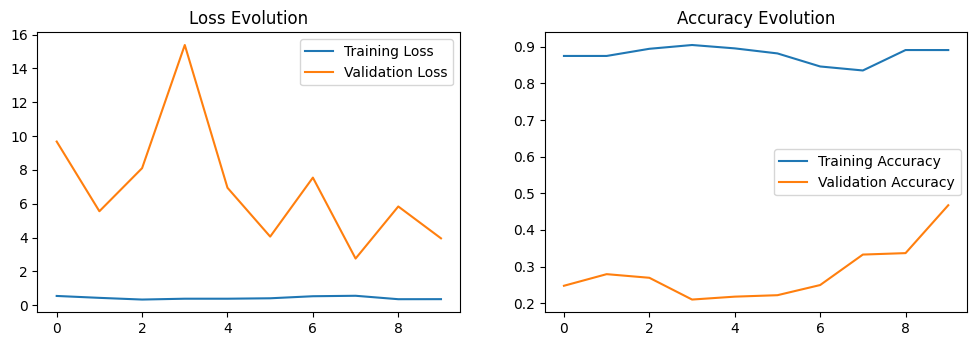

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(model_1.history['loss'], label="Training Loss")
plt.plot(model_1.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Evolution")

plt.subplot(2,2,2)
plt.plot(model_1.history['accuracy'], label="Training Accuracy")
plt.plot(model_1.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Evolution")

In [18]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"TrainAccuracy: {evaluation[1] * 100:.2f}%")

16/16 [==============================] - 6s 326ms/step - loss: 4.1721 - accuracy: 0.4990
Test Accuracy: 49.90%
56/56 [==============================] - 18s 306ms/step - loss: 3.4816 - accuracy: 0.5415
TrainAccuracy: 54.15%


In [13]:
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype("int32")

16/16 [==============================] - 3s 137ms/step


In [14]:
from sklearn.metrics import classification_report
import numpy as np

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

# compute the confusion matrix
classification_report = classification_report(y_true, y_pred_classes)

print(classification_report)

              precision    recall  f1-score   support

           0       0.11      0.16      0.13        80
           1       0.17      0.29      0.21       102
           2       0.14      0.28      0.19        82
           3       0.33      0.01      0.02       118
           4       0.26      0.09      0.14        96
           5       0.00      0.00      0.00        27

    accuracy                           0.15       505
   macro avg       0.17      0.14      0.11       505
weighted avg       0.20      0.15      0.12       505



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
